## Множественная линейная регрессия на чистых данных

1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
2. Загрузите датасет отсюда. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.


In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
x_ = pd.read_csv('data/8_x.csv',names=['x1','x2','x3','x4','x5','x6','x7'], header=None)
y_ = pd.read_csv('data/8_y.csv', names = ['Y'], header=None)

In [3]:
x_.head()

,x1,x2,x3,x4,x5,x6,x7
0,1.514584,-0.621563,-1.277379,-1.236340,0.449646,-0.713396,-0.008099
1,0.120996,0.969454,0.572916,-0.449216,-1.231906,-0.154540,-0.217604
2,0.091450,-1.781662,0.971287,-0.342499,0.358784,-0.474612,-0.629888
3,-1.128455,-1.036818,0.594698,-0.613796,2.937939,1.617190,0.236998
4,0.868826,-0.913182,0.366585,-0.254660,-0.185404,-0.863618,0.214062


In [4]:
y_.head()

,Y
0,-88.370484
1,-33.342405
2,-132.859442
3,156.519597
4,-71.378443


3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.




In [5]:
# точки данных x
x_.shape

(83, 7)

In [6]:
# точки данных y
y_.shape

(83, 1)

In [7]:
# 83 записи, 7 признаков

Статистика по каждому признаку

In [8]:
x_.describe()

,x1,x2,x3,x4,x5,x6,x7
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,0.083742,-0.038892,-0.077287,0.202356,0.111821,-0.106154,-0.044355
std,1.181994,0.941986,0.891228,1.226907,1.019480,1.007005,0.929658
min,-3.545896,-1.889278,-2.538651,-2.502444,-2.621536,-2.452811,-2.007143
25%,-0.589996,-0.687546,-0.486259,-0.611158,-0.590063,-0.760261,-0.748415
50%,0.120996,-0.099994,0.020013,0.133044,0.150418,-0.154540,-0.009249
75%,0.831314,0.692257,0.559829,1.199444,0.715865,0.658789,0.680093
max,2.470810,2.157520,1.884430,2.594291,2.937939,1.626076,1.909412


In [9]:
y_.describe()

,Y
count,83.000000
mean,-9.601932
std,120.800458
min,-336.124426
25%,-87.287939
50%,-2.394386
75%,67.341250
max,221.017606


4. Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size=.2, random_state=10)

5. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
y_1 = LinearRegression().fit(x_train[['x1']].values, y_train.values)
y_2 = LinearRegression().fit(x_train[['x2']].values, y_train.values)
y_3 = LinearRegression().fit(x_train[['x3']].values, y_train.values)
y_4 = LinearRegression().fit(x_train[['x4']].values, y_train.values)
y_5 = LinearRegression().fit(x_train[['x5']].values, y_train.values)
y_6 = LinearRegression().fit(x_train[['x6']].values, y_train.values)
y_7 = LinearRegression().fit(x_train[['x7']].values, y_train.values)

In [13]:
y_1_t_res = y_1.predict(x_test[['x1']].values)
y_2_t_res = y_2.predict(x_test[['x2']].values)
y_3_t_res = y_3.predict(x_test[['x3']].values)
y_4_t_res = y_4.predict(x_test[['x4']].values)
y_5_t_res = y_5.predict(x_test[['x5']].values)
y_6_t_res = y_6.predict(x_test[['x6']].values)
y_7_t_res = y_7.predict(x_test[['x7']].values)

In [14]:
r_2 = []

x1

R^2 score:  -0.08047996283673564


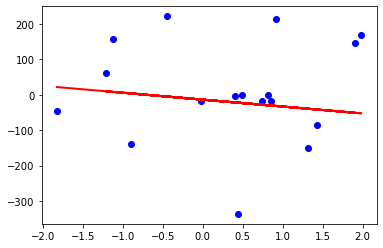

In [15]:
plt.scatter(x_test[['x1']].values, y_test.values, color='b')
plt.plot(x_test[['x1']].values, y_1_t_res, color='r', linewidth=2)
r_2.append(y_1.score(x_test[['x1']].values,  y_test.values))

print('R^2 score: ', r_2[-1])

_связь крайне слабая_  
_по факту, модель получилась «бесполезной» и ее предсказания хуже, чем оценки на основе среднего значения_


x2

R^2 score:  -0.014351500397798755


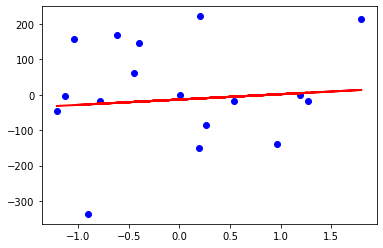

In [16]:
plt.scatter(x_test[['x2']].values, y_test.values, color='b')
plt.plot(x_test[['x2']].values, y_2_t_res, color='r', linewidth=2)
r_2.append(y_2.score(x_test[['x2']].values,  y_test.values))

print('R^2 score: ', r_2[-1])

_связь крайне слабая_   
_по факту, модель получилась «бесполезной» и ее предсказания хуже, чем оценки на основе среднего значения_

x3

R^2 score:  -0.14023161786653282


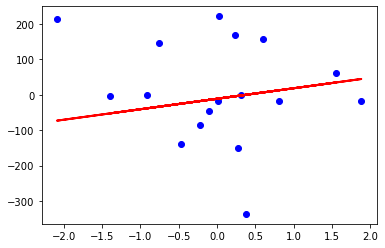

In [17]:
plt.scatter(x_test[['x3']].values, y_test.values, color='b')
plt.plot(x_test[['x3']].values, y_3_t_res, color='r', linewidth=2)
r_2.append(y_3.score(x_test[['x3']].values,  y_test.values))

print('R^2 score: ', r_2[-1])

_связь крайне слабая_  
_по факту, модель получилась «бесполезной» и ее предсказания хуже, чем оценки на основе среднего значения_

x4

R^2 score:  -0.012803861757792578


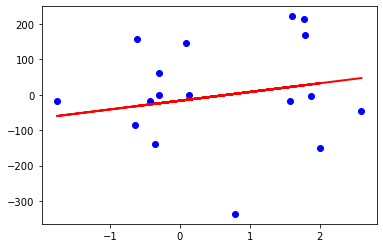

In [18]:
plt.scatter(x_test[['x4']].values, y_test.values, color='b')
plt.plot(x_test[['x4']].values, y_4_t_res, color='r', linewidth=2)
r_2.append(y_4.score(x_test[['x4']].values,  y_test.values))

print('R^2 score: ', r_2[-1])

_связь крайне слабая_  
_по факту, модель получилась «бесполезной» и ее предсказания хуже, чем оценки на основе среднего значения_

x5

R^2 score:  -0.033648145287149545


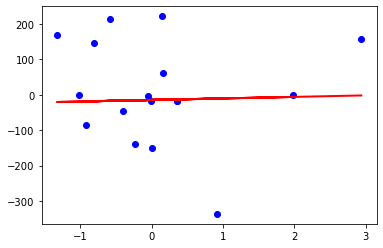

In [19]:
plt.scatter(x_test[['x5']].values, y_test.values, color='b')
plt.plot(x_test[['x5']].values, y_5_t_res, color='r', linewidth=2)
r_2.append(y_5.score(x_test[['x5']].values,  y_test.values))

print('R^2 score: ', r_2[-1])

_связь крайне слабая_  
_по факту, модель получилась «бесполезной» и ее предсказания хуже, чем оценки на основе среднего значения_

x6

R^2 score:  0.5304302662592224


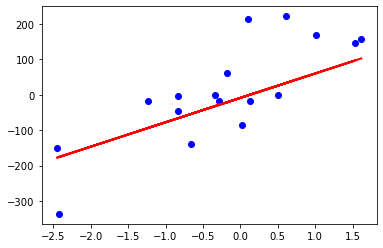

In [20]:
plt.scatter(x_test[['x6']].values, y_test.values, color='b')
plt.plot(x_test[['x6']].values, y_6_t_res, color='r', linewidth=2)
r_2.append(y_6.score(x_test[['x6']].values,  y_test.values))

print('R^2 score: ', r_2[-1])

_связь средняя_

x7

R^2 score:  0.5439305596302864


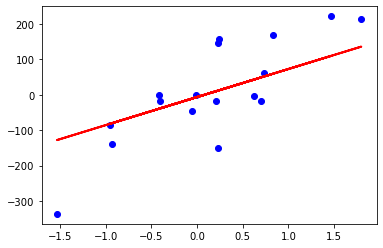

In [21]:
plt.scatter(x_test[['x7']].values, y_test.values, color='b')
plt.plot(x_test[['x7']].values, y_7_t_res, color='r', linewidth=2)
r_2.append(y_7.score(x_test[['x7']].values,  y_test.values))

print('R^2 score: ', r_2[-1])

_связь средняя_

6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [22]:
import statsmodels.formula.api as sm

data = pd.DataFrame(np.array(x_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]), 
                            columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
data['y'] = np.array(y_train)
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

# ols - метод наименьших квадратов
model = sm.ols(formula='y~x1+x2+x3+x4+x5+x6+x7', data=data)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1135.
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.38e-59
Time:                        21:54:28   Log-Likelihood:                -243.45
No. Observations:                  66   AIC:                             502.9
Df Residuals:                      58   BIC:                             520.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1329      1.305     -0.102      0.919      -2.744       2.478
x1            -2.0649      1.100     -1.878      0.065      -4.266       0.136
x2            16.7477      1.348     12.423      0.000      14.049      19.446
x3             0.8363      1.536      0.545      0.588      -2.237       3.910
x4            14.3989      1.085     13.276      0.000      12.228      16.570
x5             6.9407      1.272      5.455      0.000       4.394       9.488
x6            82.8213      1.420     58.321      0.000      79.979      85.664
x7            95.5030      1.408     67.819      0.000      92.684      98.322
==============================================================================
Omnibus:                        0.900   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.964
Skew:                           0.177   Prob(JB):                        0.617
Kurtosis:                       2.525   Cond. No.                         1.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Значение R^2 = 0.993 (и скорректированный R^2 = 0.992), значит сила связи весьма высокая (процентное изменение зависимой переменной, которое объясняется независимыми переменными)
Наиболее сильно влиящие факторы - это x6 и x7, т.к. у них наибольшие коэффициенты.

Критерий Фишера, говорящий об общей значимости регрессии.
Prob (F-statistic) = 1.38e-59, т.е. вероятность близка к нулю. В целом регрессия является значимой.

По критерию Дарбина – Уотсона, автокорреляция отсутствует (1.5 < DW < 2.5). Также видим, что гомоскедастичность присутствует (1 < DW < 2). Также значение скоса мало (Skew = 0.177) Результаты регрессии надежны с точки зрения интерпретации этой метрики.

**Таким образом, модель хорошая**

## Дополнительные задания

1. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [23]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x1 =>
второй порядок
R^2:  -0.11780887462246148


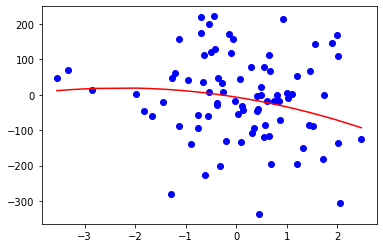

третий порядок
R^2:  -0.17414804918005622


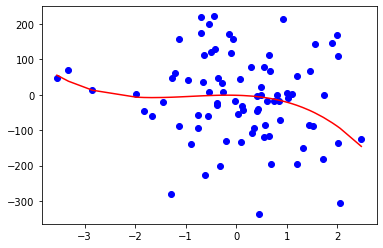

десятый порядок
R^2:  -0.2560548614558067


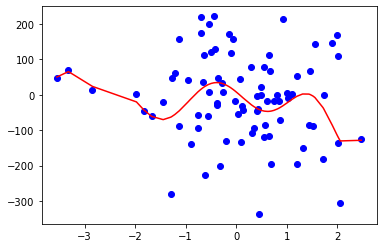




x2 =>
второй порядок
R^2:  -0.03495813659644553


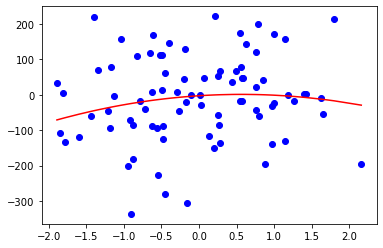

третий порядок
R^2:  -0.20448274753450124


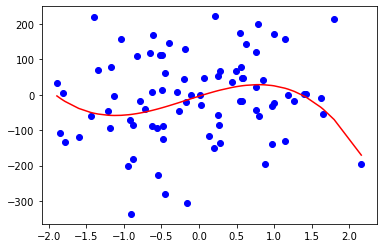

десятый порядок
R^2:  -0.6111420207092497


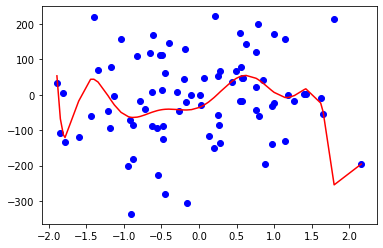




x3 =>
второй порядок
R^2:  -0.14082063478829743


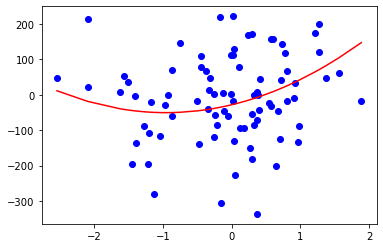

третий порядок
R^2:  -0.1155484620541769


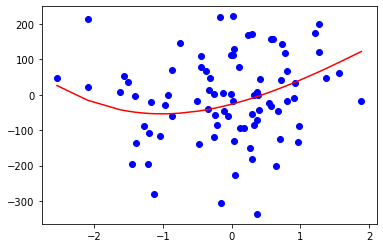

десятый порядок
R^2:  -1543.4880122356751


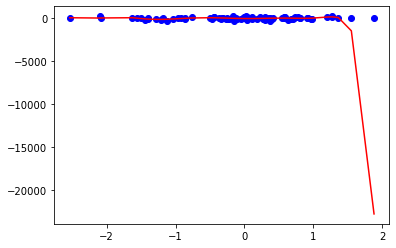




x4 =>
второй порядок
R^2:  -0.014848808618187048


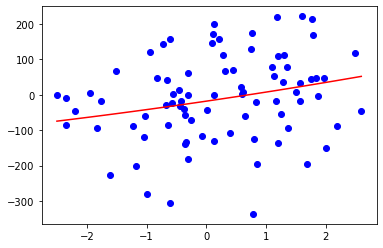

третий порядок
R^2:  -0.014238369009170304


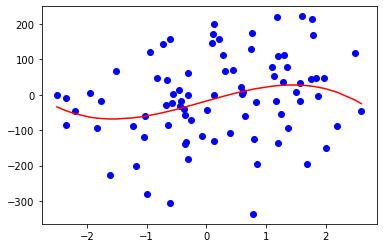

десятый порядок
R^2:  -1.0288507306299275


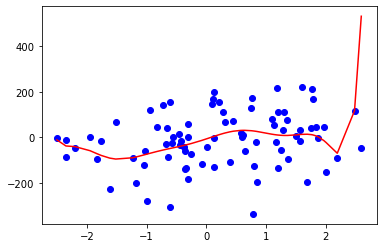




x5 =>
второй порядок
R^2:  0.020799728771586312


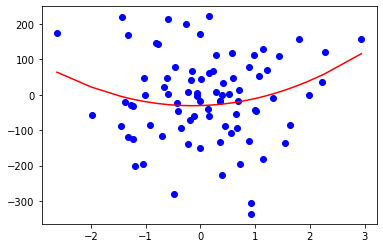

третий порядок
R^2:  0.0010098819296141537


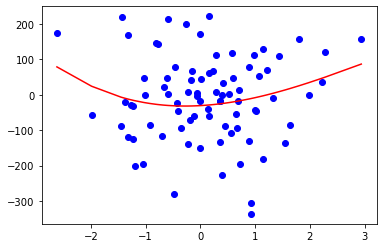

десятый порядок
R^2:  -101.45637574783319


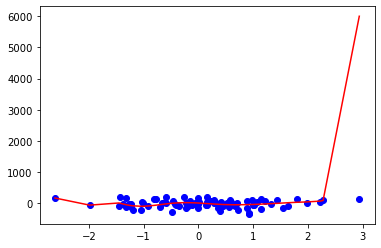




x6 =>
второй порядок
R^2:  0.543066684754769


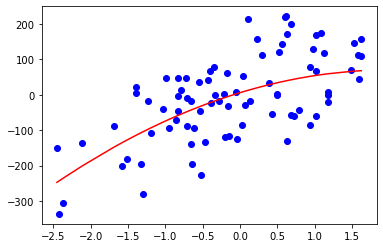

третий порядок
R^2:  0.5435262353864478


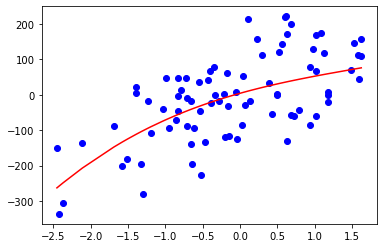

десятый порядок
R^2:  0.5368369036884189


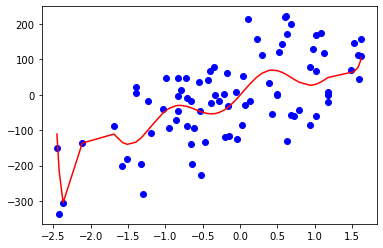




x7 =>
второй порядок
R^2:  0.5444480230362747


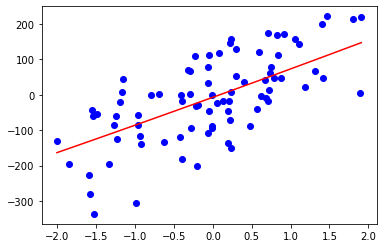

третий порядок
R^2:  0.5392387935596563


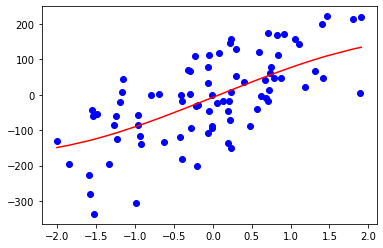

десятый порядок
R^2:  0.16771377925662223


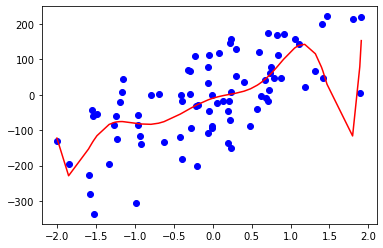

In [24]:
from sklearn.preprocessing import PolynomialFeatures

r_2_poly_2 = []
r_2_poly_3 = []
r_2_poly_10 = []

for col in x_train.columns:
    print(col, '=>')
    poly2 = PolynomialFeatures(degree = 2)
    poly3 = PolynomialFeatures(degree = 3)
    poly10 = PolynomialFeatures(degree = 10)
    
    x_poly2 = poly2.fit_transform(x_train[col].values.reshape((-1, 1)))
    new_reg2 = LinearRegression().fit(x_poly2, y_train)
    
    x_poly3 = poly3.fit_transform(x_train[col].values.reshape((-1, 1)))
    new_reg3 = LinearRegression().fit(x_poly3, y_train)
    
    x_poly10 = poly10.fit_transform(x_train[col].values.reshape((-1, 1)))
    new_reg10 = LinearRegression().fit(x_poly10, y_train)
    
    r_2_poly_2.append(new_reg2.score(poly2.fit_transform(x_test[col].values.reshape((-1, 1))), y_test))
    print('второй порядок\nR^2: ', r_2_poly_2[-1])
    plt.figure()
    plt.scatter(x_[col], y_, color='b')
    plt.plot(x_[col].sort_values(), new_reg2.predict(poly2.fit_transform(x_[col].sort_values().values.reshape((-1, 1)))), color='r')
    plt.show()
    
    r_2_poly_3.append(new_reg3.score(poly3.fit_transform(x_test[col].values.reshape((-1, 1))), y_test))
    print('третий порядок\nR^2: ', r_2_poly_3[-1])
    plt.figure()
    plt.scatter(x_[col], y_, color='b')
    plt.plot(x_[col].sort_values(), new_reg3.predict(poly3.fit_transform(x_[col].sort_values().values.reshape((-1, 1)))), color='r')
    plt.show()
    
    r_2_poly_10.append(new_reg10.score(poly10.fit_transform(x_test[col].values.reshape((-1, 1))), y_test))
    print('десятый порядок\nR^2: ', r_2_poly_10[-1])
    plt.figure()
    plt.scatter(x_[col], y_, color='b')
    plt.plot(x_[col].sort_values(), new_reg10.predict(poly10.fit_transform(x_[col].sort_values().values.reshape((-1, 1)))), color='r')
    plt.show()
    
    print('\n\n')

Видя значения R^2, которые очень неутешительны. В целом, результаты такие же, как у парной регрессии, но иногда даже хуже. 
В данном случае, множественная регрессия, сделанная ранее, является лучшим решением, 
т.к. все нецелевые признаки в своей совокупности оказывают влияние на целевой признак.

2. Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.


In [25]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = [" ", "linear regression", "Polynomial Regression (degree=2)", 
                     "Polynomial Regression (degree=3)", "Polynomial Regression (degree=10)"]

for i in range(7):
    table.add_row([f'x{i+1}', r_2[i], r_2_poly_2[i], r_2_poly_3[i], r_2_poly_10[i]])

In [26]:
table

,linear regression,Polynomial Regression (degree=2),Polynomial Regression (degree=3),Polynomial Regression (degree=10)
x1,-0.08047996283673564,-0.11780887462246148,-0.17414804918005622,-0.2560548614558067
x2,-0.014351500397798755,-0.03495813659644553,-0.20448274753450124,-0.6111420207092497
x3,-0.14023161786653282,-0.14082063478829743,-0.1155484620541769,-1543.4880122356751
x4,-0.012803861757792578,-0.014848808618187048,-0.014238369009170304,-1.0288507306299275
x5,-0.033648145287149545,0.020799728771586312,0.0010098819296141537,-101.45637574783319
x6,0.5304302662592224,0.543066684754769,0.5435262353864478,0.5368369036884189
x7,0.5439305596302864,0.5444480230362747,0.5392387935596563,0.16771377925662223


3. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

res = [y_1_t_res, y_2_t_res, y_3_t_res, y_4_t_res, y_5_t_res, y_6_t_res, y_7_t_res]


for i in range(7):
    print(f'x{i+1}')
    print('mse: ', np.sqrt(mean_squared_error(res[i], y_test.values)))
    print('mae: ', mean_absolute_error(res[i], y_test.values))
    print()

x1
mse:  146.31273929408854
mae:  109.95997427545012

x2
mse:  141.76467303753603
mae:  107.47918125974232

x3
mse:  150.30392520105843
mae:  113.69556087984174

x4
mse:  141.6564835998857
mae:  111.984574464359

x5
mse:  143.10675942227635
mae:  104.86261762524735

x6
mse:  96.45479689863302
mae:  76.08547911267249

x7
mse:  95.05813052705581
mae:  74.30501836120973



4. (*) Повторите те же действия на датасетах из данной папки. Замерьте время обучения на разных датасетах и количестве признаков. Сделайте вывод о зависимости скорости обучения от объема обучающей выборки.



In [28]:
x_train.shape, y_train.shape

((66, 7), (66, 1))

In [29]:
regr = LinearRegression()

In [30]:
%timeit regr.fit(x_train,y_train)

5.54 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
x_38 = pd.read_csv('data/38_x.csv',names=['x1','x2','x3','x4','x5'], header=None)
y_38 = pd.read_csv('data/38_y.csv', names = ['Y'], header=None)

x_train_38, x_test_38, y_train_38, y_test_38 = train_test_split(x_38, y_38, test_size=0.2, random_state=0)
x_train_38.shape, y_train_38.shape

((281, 5), (281, 1))

In [32]:
%timeit regr.fit(x_train_38,y_train_38)

4.44 ms ± 677 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


признаков меньше, но сам размер датасета больше. Время увеличилось почти в 1,5 раза

In [33]:
x_49 = pd.read_csv('data/49_x.csv',names=['x1','x2','x3'], header=None)
y_49 = pd.read_csv('data/49_y.csv', names = ['Y'], header=None)

x_train_49, x_test_49, y_train_49, y_test_49 = train_test_split(x_49, y_49, test_size=0.2, random_state=0)
x_train_49.shape, y_train_49.shape

((252, 3), (252, 1))

In [34]:
%timeit regr.fit(x_train_49,y_train_49)

4.62 ms ± 547 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


признаков меньше, и размер датасета больше, чем в случае выше. Время стало на 0.6 ms меньше

**чем больше объем данных, тем дольше обучение модели**

## Контрольные вопросы

1. Чем множественная регрессия отличается от парной?

Множественной называют линейную регрессию, в модели которой число независимых переменных две или более. (в парной регессии одна независимая переменная)

2. Какую функцию ошибки использует модель линейной регрессии?

Функция потерь - среднеквадратичная ошибка (MSE). Чтобы вычислить MSE, берутся все значения ошибок, считаются их квадраты длин и усредняются.

3. Какие метрики эффективности можно применять для оценки регрессионных моделей?

- Средняя абсолютная ошибка (или среднее абсолютное отклонение)
- коэффициент детерминации
- среднеквадратичная ошибка (RMSE)

4. Какие еще регрессоры есть в библиотеке sklearn?




- Stochastic Gradient Descent - SGD
- Perceptron
- Quantile Regression
- Gaussian Process Regression (GPR)